# Assignment: Unsupervised Machine Learning \ Clustering

## Part 1: Partitional Clustering

In this assignment you will experience with partitional & mixture model clustering. The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

In [239]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import (make_blobs, make_circles, make_moons)
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

SEED = 123

## Things to add:
* Improve code using google kmeans
* Use K++

### Read blood test results as an EMR from an Excel file

In [240]:
# Open the file
xlsx = pd.ExcelFile('EMR-Blood.xlsx')

# Get the first sheet as an object
sheet1 = xlsx.parse(0)

# Set the Key column as the index
sheet1.set_index("Key", inplace=True)

# Show first 10 rows
sheet1[:10]

,Na,K,ALT,AST,WBC,RBC,Hgb,Hct
Key,,,,,,,,
1,141,4.65,31.92,35.01,10.25,4.06,17.6,36.3
2,140,4.96,36.41,16.70,6.13,3.80,13.2,35.6
3,136,3.66,41.43,13.17,5.86,4.26,16.2,43.7
4,136,4.74,23.92,30.33,10.80,4.83,16.1,49.8
5,140,4.74,43.66,20.44,6.59,4.05,12.6,39.1
6,146,3.98,48.41,33.22,4.53,4.04,17.9,47.3
7,144,5.29,44.29,19.28,10.12,3.96,17.2,47.9
8,138,4.57,50.43,16.39,4.66,4.91,13.7,41.5
9,144,3.96,31.51,34.87,4.57,4.72,15.1,47.6


### Blood Test Abbreviations
- Na == Sodium
- K == Potassium
- ALT == Alanine transaminase
- AST == Aspartate transaminase
- WBC == White blood cells
- RBC == Red blood cells
- Hgb == Hemoglobin
- Hct == Hematocrit

### Use K-Means to create clusters according to variables of uniform distribution

Questions:
* What does it mean according to variable of uniform distribution?
    * are ```variables1 = ["K","WBC","Hgb"]``` uniform?<br>
    we can test it by plotting them and seeing there distribution or using some library to test there distribution.
* We are asked to predict, but we don't have any test data, should we train_test_split and than predict?

In [241]:
# Retrieve the K, WBC and Hgb column values from the dataset to cluster
variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

# Run the K-Means algorithm, assuming the correct number of clusters is 5
model_kmeans = KMeans(5, random_state=SEED).fit(EMR3d1)

y_pred_KMeans1 = model_kmeans.predict(EMR3d1)

### Make a 3D chart

C:\Users\itay8\AppData\Local\Temp\ipykernel_7836\1526041088.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


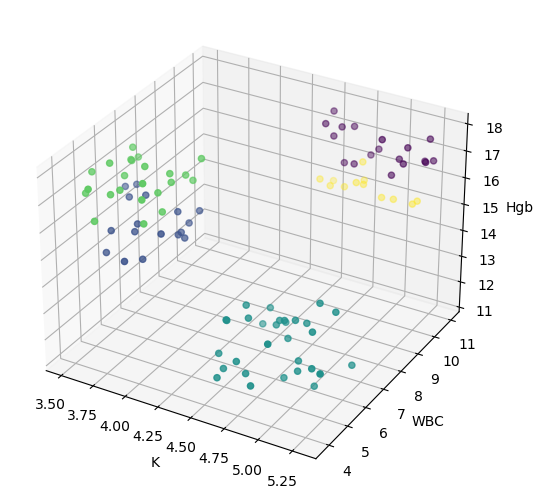

In [242]:
def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

## Task 1 (_max score - 50 points_)
Implement  Lloyd's Algorithm for solving the K-Means problem, as shown in class. 
By examining the WCSS, choose a proper threshold to determine algorithm convergence.

Check your algorithm on 'EMR-Blood.xlsx' dataset. Compare your results to the _sklearn_ version - what can affect any differences you might've got?

In [243]:
X = np.array([[1,1,1], [1,2,2],[2,1,1],[2,2,2], [6,6,6], [6,7,7],[7,6,6],[7,7,7]]).astype('float')
centroids = np.array([[1,3,3],[7,5,5]]).astype('float')

# model = K_means(2, centroids)
# model.fit(X)

# y_pred = model.predict(X)
# print()

dist_sq   = np.square(np.expand_dims(centroids,axis=1) - np.expand_dims(X, axis=0))
dist_sum  = np.sum(dist_sq, axis=-1)
dist_sqrt = np.sqrt(dist_sum)
print(dist_sqrt)



[[2.82842712 1.41421356 3.         1.73205081 6.55743852 7.54983444
  7.34846923 8.24621125]
 [8.24621125 7.34846923 7.54983444 6.55743852 1.73205081 3.
  1.41421356 2.82842712]]


In [244]:
arr = np.array([[1,2,3],[4,5,np.nan],[np.nan,np.nan,np.nan]])
np.isnan(arr[1]).any()

True

Mistakes:
1. prev_centroids = centroids
    centroids[centroid_n] =  some mean calculation<br>
    comparing between the old and the new did not result in any differences<br>
    
    Because when ever I changed centroids I would change prev_centroids.<br>
    np.copy(centroids) #should solve this 
2. 

0.5
62.83333333333333
[[7.         6.5       ]
 [3.         3.16666667]]
2.0
2.0
[[6.5 6.5]
 [1.5 1.5]]

TSS: 104.0 WCSS: 4.0 BCSS: 100.0


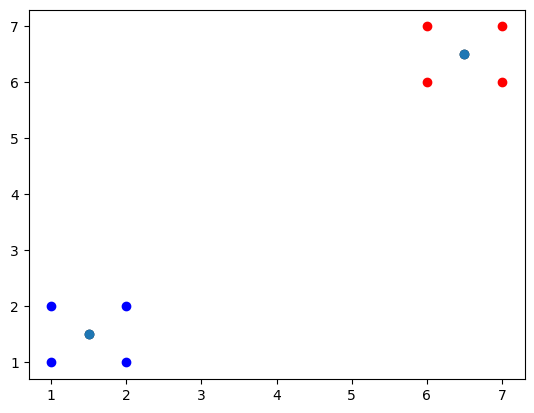

In [325]:
# Add your code for task1 after this line, and keep it in this cell.

# Implement K-Means (X being the data)
class K_means():
    def __init__(self, k, centroids = [],random_state=123, epochs=5, threshold=10) :
        # print('Itay')
        self.k = k
        self.centroids = centroids
        self.epochs = epochs
        self.WCSS_ls = []
        self.threshold = threshold
    
    def euclidian_distance(self, A, B):
        dist_sq   = np.square(np.expand_dims(A,axis=1) - np.expand_dims(B, axis=0))
        dist_sum  = np.sum(dist_sq, axis=-1)
        dist_sqrt = np.sqrt(dist_sum)
        return dist_sqrt

    def fit(self, X):
        epochs = 0
        idx_of_points =  np.random.choice(X.shape[0],self.k)
        self.centroids = X[idx_of_points]
        # self.centroids = X[[1,2,3,4,5]]

        while len(self.WCSS_ls) < 2 or ((self.WCSS_ls[-2] - self.WCSS_ls[-1]) < 0 and self.epochs > epochs):
            
            epochs +=1  
            # calculating distance
            dist_sq   = np.square(np.expand_dims(self.centroids,axis=1) - np.expand_dims(X, axis=0))
            dist_sum  = np.sum(dist_sq, axis=-1)
            dist_sqrt = np.sqrt(dist_sum)

            # getting points that are closest to the centroids
            points_correlated_to_centroid = dist_sqrt.argmin(axis=0)
            wcss = 0
            prev_centroids = np.copy(self.centroids)
            
            for centroid_n,centroid in enumerate(self.centroids):
                # readjusting centroids
                self.centroids[centroid_n] =  np.mean(X[points_correlated_to_centroid == centroid_n],axis=0)
                print(np.sum((self.centroids[centroid_n] - X[points_correlated_to_centroid == centroid_n])**2))
                wcss += np.sum((self.centroids[centroid_n] - X[points_correlated_to_centroid == centroid_n])**2)
            print(self.centroids)
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            
            self.WCSS_ls.append(wcss)
            if(len(self.WCSS_ls) >= 2 and (self.WCSS_ls[-1] > self.WCSS_ls[-2])):
                self.WCSS_ls.pop()
                self.centroids = prev_centroids
                break
        

    def _create_rand_point(self, X):
        n = X.shape[1]
        min,max   = np.min(X, axis=0), np.max(X, axis=0)
        centroids = np.random.uniform(low=min, high=max, size=(self.k, n,))
        return centroids       

    def predict(self, X):
        distance_matrix = np.sqrt(np.sum((self.centroids[:, None, :] - X[None, :, :])**2, axis=-1))

        return np.argmin(distance_matrix,axis=0)

    def score(self, X):
        # return wcss bcss tss
        TSS = np.sum((X-np.mean(X))**2)
        WCSS = self.WCSS_ls[-1]
        BCSS = TSS - WCSS
        print('TSS:', TSS, 'WCSS:',WCSS, 'BCSS:', BCSS)
        

X = np.array([[1,1], [1,2],[2,1],[2,2], [6,6], [6,7],[7,6],[7,7]]).astype('float')
centroids = np.array([[1,3],[7,5]]).astype('float')

model = K_means(2, centroids)
model.fit(X)

y_pred = model.predict(X)
print()
red = X[y_pred == 0]
blue = X[y_pred== 1]
test = np.array([ [1.5,1], [1.5,3]])
centers = model.centroids
plt.scatter(red[:,0],red[:,1],c='red')
plt.scatter(blue[:,0],blue[:,1],c='blue')
plt.scatter(centers[:,0],centers[:,1],c = "black")

plt.scatter(model.centroids[:, 0], model.centroids[:,1])
model.score(X)

Example of issues with clustering:

* WCSS objective assums that the
clusters are isotropic (and convex):

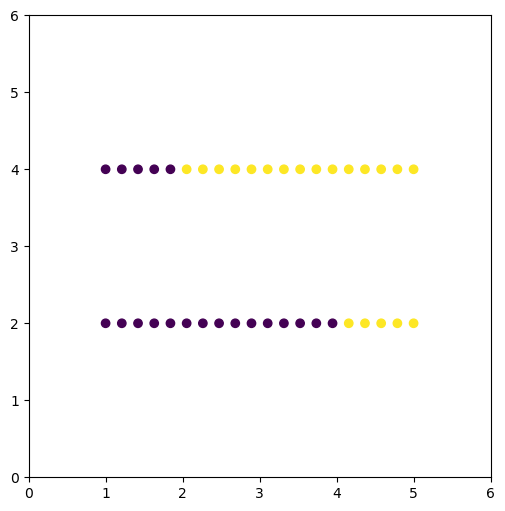

In [246]:
# Create horizantal data
# Taken from here: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

X = np.tile(np.linspace(1, 5, 20), 2)
y = np.repeat(np.array([2, 4]), 20)
df = np.c_[X, y]

km = K_means(k=2)
km.fit(df)
labels = km.predict(df)
centroids = km.centroids

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X, y, c=labels, )
plt.xlim([0, 6])
plt.ylim([0, 6])

ax.set_aspect('equal')

Example of issues with clustering:

* Our objective tend to prefer larger clusters when we
have unequal size of blobs:

141.60596335313016
9.721213913729676
1707.740314733022
214.97540240897024
1.5725597041478458
[[ 3.25461145  1.44879955]
 [ 4.27070763 -1.21580573]
 [ 5.99514561  5.4614966 ]
 [ 1.76399017  3.02367208]
 [ 4.66415058 -0.54406103]]
44.90682616579794
14.93997100143562
864.2016972579759
76.26582076264681
27.805500465562233
[[ 3.66659496  1.24206622]
 [ 3.5563447  -0.9491937 ]
 [ 6.18555127  6.08935804]
 [ 1.8123666   4.37244074]
 [ 4.56413323  0.00653326]]


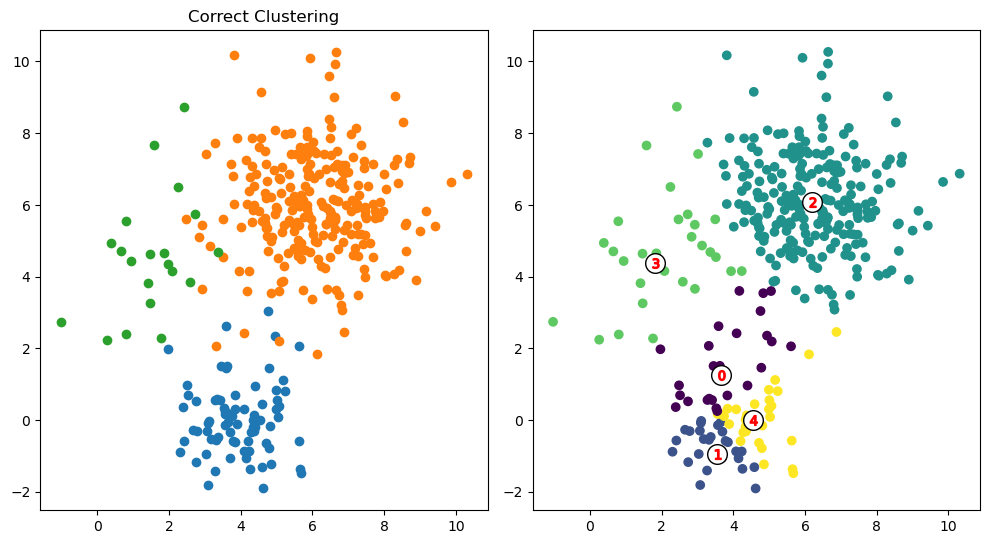

In [323]:
# Create data from three different multivariate distributions
# Taken from here: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

X_1 = np.random.multivariate_normal(mean=[4, 0], cov=[[1, 0], [0, 1]], size=75)
X_2 = np.random.multivariate_normal(mean=[6, 6], cov=[[2, 0], [0, 2]], size=250)
X_3 = np.random.multivariate_normal(mean=[1, 5], cov=[[1, 0], [0, 2]], size=20)
df = np.concatenate([X_1, X_2, X_3])

# Run kmeans
km = K_means(k=3)
km.fit(df)
labels = km.predict(df)
centroids = km.centroids

# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].scatter(X_1[:, 0], X_1[:, 1])
ax[0].scatter(X_2[:, 0], X_2[:, 1])
ax[0].scatter(X_3[:, 0], X_3[:, 1])
ax[0].set_title('Correct Clustering')
ax[0].set_aspect('equal')
ax[1].scatter(df[:, 0], df[:, 1], c=labels)
ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    ax[1].scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')
ax[1].set_aspect('equal')
ax[1].set_title('')
plt.tight_layout()

11.441846510851125
1.7702899891647947
148.25010145379565
163.56991999659735
25.206055688361104
[[ 0.37880463 -0.87872802]
 [ 0.56228231  0.85144041]
 [ 0.15722739  0.56144386]
 [-0.48384259 -0.24710492]
 [ 0.58145932 -0.22174704]]
23.09132030232403
13.361744843244725
60.41334302557438
116.89287527797924
42.41539772656864
[[ 0.19975047 -0.81844849]
 [ 0.61616905  0.72599813]
 [-0.07924226  0.5836954 ]
 [-0.56797777 -0.1944053 ]
 [ 0.6197414  -0.16705107]]
40.2962928775139
3.939048133745619
62.737821839573385
61.656794608795714
87.26760953568555
[[-0.75187708  0.55415531]
 [ 1.94764804  0.23876423]
 [ 1.25915431 -0.33307747]
 [ 0.57103353  0.71221787]
 [ 0.15199194  0.13775197]]
56.96637290520794
9.133178167928584
51.72191634359271
61.12434441689775
30.06726898370661
[[-0.68945212  0.60190772]
 [ 1.90881261  0.14612741]
 [ 1.1477732  -0.34376446]
 [ 0.52007648  0.7501679 ]
 [ 0.20061816 -0.01101412]]


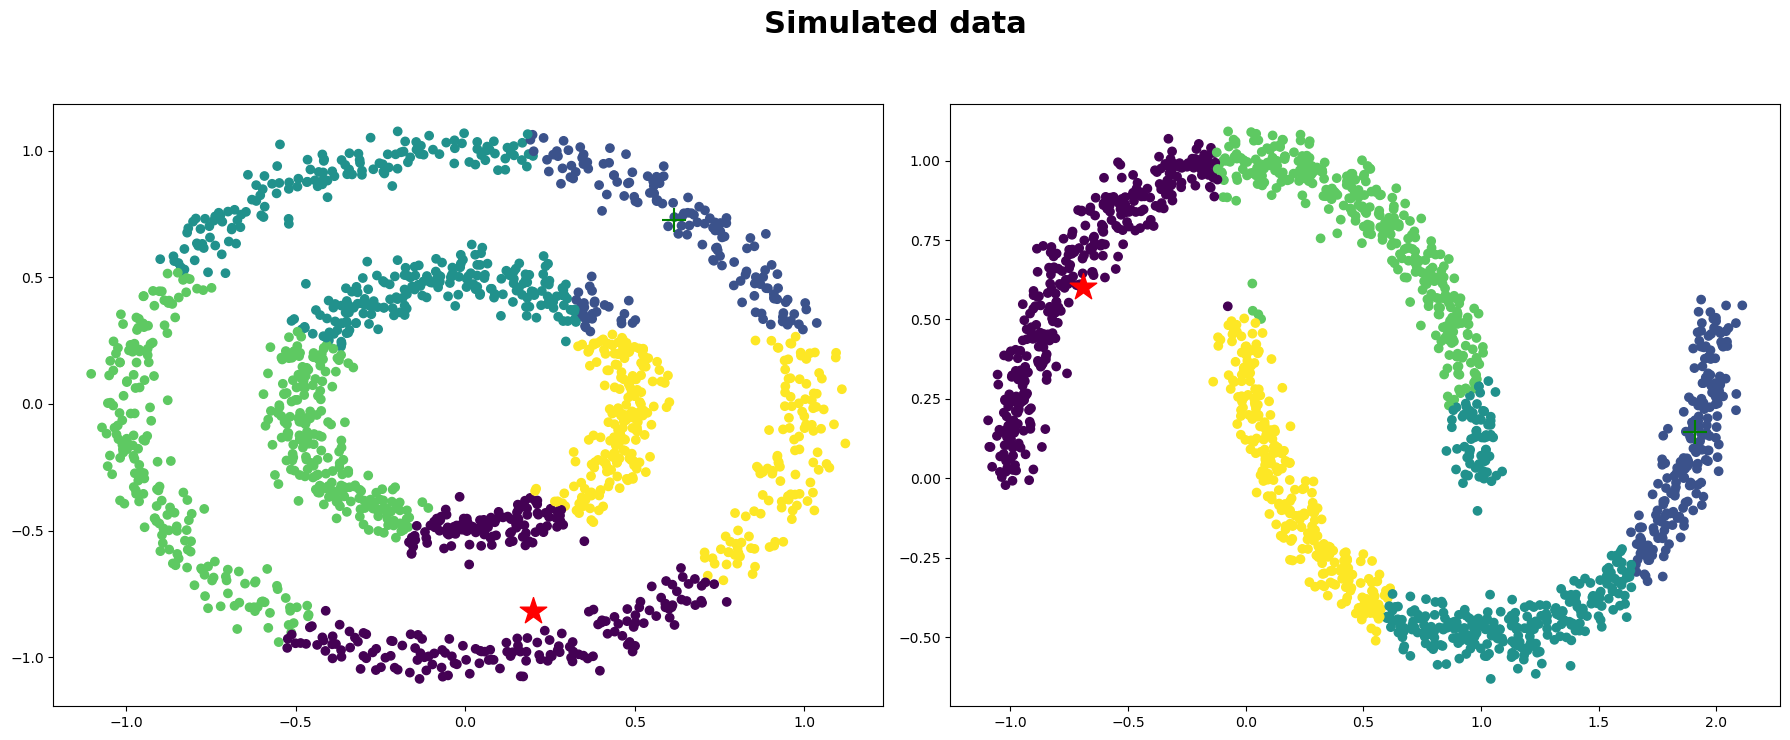

In [324]:
# Cricles
# Taken from here: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

X1 = make_circles(factor=0.5, noise=0.05, n_samples=1500)

# Moons
X2 = make_moons(n_samples=1500, noise=0.05)

fig, ax = plt.subplots(1, 2)
for i, X in enumerate([X1, X2]):
    fig.set_size_inches(18, 7)
    km = K_means(k=2)
    km.fit(X[0])
    labels = km.predict(X[0])
    centroids = km.centroids

    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=labels)
    ax[i].scatter(centroids[0, 0], centroids[0, 1], marker='*', s=400, c='r')
    ax[i].scatter(centroids[1, 0], centroids[1, 1], marker='+', s=300, c='green')
plt.suptitle('Simulated data', y=1.05, fontsize=22, fontweight='semibold')
plt.tight_layout()

## Task 2 (_max score - 30 points_)

Humans can clearly spot 3 clusters, however, for machines it's much harder to "learn" that. In the above implementation, K-Means was given the value of 5 as K.
Develop a **generic** mechanism for finding the most reasonable number of clusters by:
1. Iterating K over a reasonable range, which should be derived from the number of points
2. Choose a proper K based on the heuristics learned in class
3. Showing the final clusters in a 3D chart (for your implementation of K-Means algorithm)

In [320]:
WCSS_ls = []

km = K_means(k=5)
km.fit(EMR3d1)
WCSS_ls.append(np.abs(km.WCSS_ls[-1]))
print(km.WCSS_ls)

23.352182608695653
39.66793103448276
31.39784000000001
4.154857142857141
4.841654545454538
[[ 4.83434783  5.13826087 13.01304348]
 [ 3.8662069   5.76448276 16.32758621]
 [ 4.87066667 10.42066667 16.42333333]
 [ 4.87571429  6.12857143 12.1       ]
 [ 3.76909091  4.55909091 17.34545455]]
20.660810000000005
34.272985185185185
31.39784000000001
5.643499999999999
9.38467692307691
[[ 4.8285      5.0515     13.085     ]
 [ 3.86        5.85074074 16.33333333]
 [ 4.87066667 10.42066667 16.42333333]
 [ 4.875       6.005      12.23      ]
 [ 3.79692308  4.56538462 17.17692308]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

23.352182608695653
39.66793103448276
31.39784000000001
4.154857142857141
4.841654545454538
[[ 4.83434783  5.13826087 13.01304348]
 [ 3.8662069   5.76448276 16.32758621]
 [ 4.87066667 10.42066667 16.42333333]
 [ 4.87571429  6.12857143 12.1       ]
 [ 3.76909091  4.55909091 17.34545455]]
20.660810000000005
34.272985185185185
31.39784000000001
5.643499999999999
9.38467692307691
[[ 4.8285      5.0515     13.085     ]
 [ 3.86        5.85074074 16.33333333]
 [ 4.87066667 10.42066667 16.42333333]
 [ 4.875       6.005      12.23      ]
 [ 3.79692308  4.56538462 17.17692308]]
[103.4144653314901, 101.35981210826212]
23.352182608695653
39.66793103448276
31.39784000000001
4.154857142857141
4.841654545454538
[[ 4.83434783  5.13826087 13.01304348]
 [ 3.8662069   5.76448276 16.32758621]
 [ 4.87066667 10.42066667 16.42333333]
 [ 4.87571429  6.12857143 12.1       ]
 [ 3.76909091  4.55909091 17.34545455]]
20.660810000000005
34.272985185185185
31.39784000000001
5.643499999999999
9.38467692307691
[[ 4.828

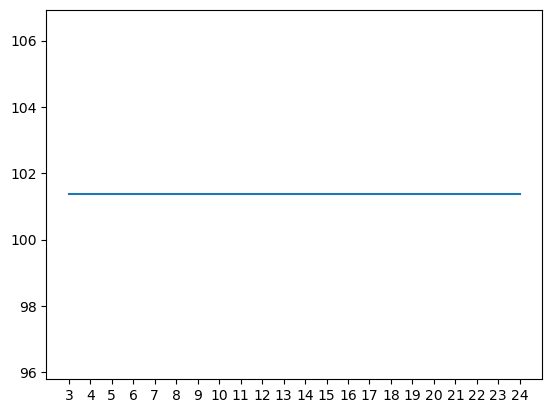

In [322]:
# Add your code for task2 after this line, and keep it in this cell.

k_values = int(EMR3d1.shape[0]/4)
starting_k = 3
WCSS_ls = []

for k in range(starting_k,k_values):
    km = K_means(k=k)
    km.fit(EMR3d1)
    WCSS_ls.append(np.abs(km.WCSS_ls[-1]))
    print(km.WCSS_ls)

    

plt.plot(range(starting_k,k_values), WCSS_ls)
plt.xticks(range(starting_k,k_values));
    


25
[[ 3.8395      5.433      16.6075    ]
 [ 4.844       5.36933333 12.8       ]
 [ 4.87066667 10.42066667 16.42333333]]
133.08592666666664
[[ 4.87066667 10.42066667 16.42333333]
 [ 4.844       5.36933333 12.8       ]
 [ 3.81521739  5.34086957 17.29130435]
 [ 3.87235294  5.55764706 15.68235294]]
107.28988170502984
[[ 4.92055556 10.35611111 17.11111111]
 [ 3.87235294  5.55764706 15.68235294]
 [ 4.844       5.36933333 12.8       ]
 [ 4.79583333 10.5175     15.39166667]
 [ 3.81521739  5.34086957 17.29130435]]
85.70362503836316
[[ 3.825       4.6535     16.67      ]
 [ 4.834       4.698      12.47333333]
 [ 4.854       6.04066667 13.12666667]
 [ 4.92055556 10.35611111 17.11111111]
 [ 3.854       6.2125     16.545     ]
 [ 4.79583333 10.5175     15.39166667]]
70.30521333333331
[[ 3.83272727  6.14545455 17.37272727]
 [ 4.92055556 10.35611111 17.11111111]
 [ 4.79583333 10.5175     15.39166667]
 [ 4.77636364  4.41636364 12.72727273]
 [ 3.79916667  4.60333333 17.21666667]
 [ 3.87235294  5.55764

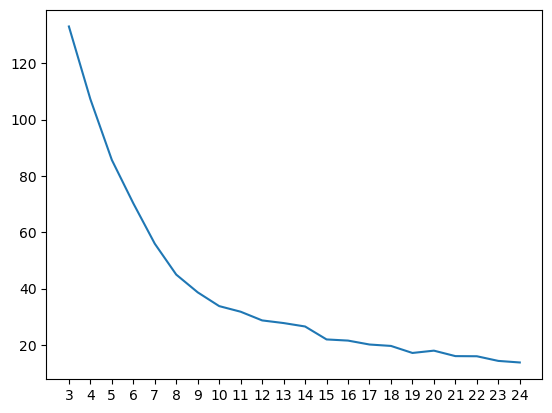

In [254]:
# Add your code for task2 after this line, and keep it in this cell.

k_values = int(EMR3d1.shape[0]/4)
print(k_values)
starting_k = 3
inertias = []
for k in range(starting_k,k_values):
    km = KMeans(n_clusters=k, init='random')
    km.fit(EMR3d1)
    print(km.cluster_centers_)
    print(km.inertia_)
    inertias.append(km.inertia_)

    

plt.plot(range(starting_k,k_values), inertias)
plt.xticks(range(starting_k,k_values));
    


### Silhouette analysis

Use graphic visualization of the Silhouette score to support your above answer:

In [ ]:
# Add your code for the Sillhouette graphic analysis
# You can use scikit-learn Sillhouette page as a reference

from sklearn.metrics import silhouette_samples, silhouette_score

def plot_Silhouette(X, y, num_clusters):
    # YOUR CODE HERE
    pass


#### From this section on - please use the sklearn's K-means

## Part 2: Mixture Models Clustering 

### Use K-Means to create clusters according to variables of both uniform and Gaussian distributions

In [ ]:
# Retrieve the ALT, AST and RBC column values from the dataset to cluster
variables2 = ["ALT","AST","RBC"]
EMR3d2 = sheet1.loc[:, variables2].values

# Run the K-Means algorithm
# NOTICE, this time, we know that the correct number of clusters is 2
y_pred_KMeans2 = # YOUR CODE HERE

# Make a 3D chart
make_chart(EMR3d2, y_pred_KMeans2, variables2)

## Task 3 (_max score - 20 points_)
Scientists have found that in this population of patients, RBC distribution is uniform, ALT distribution is a Gaussian and AST distribution is a mixture of two Gaussians. Clearly, even by giving K-Means the correct K, the algorithm got to the wrong conclusion. This separation is "technically" correct, but lacks some underlying understanding of the natural phenomena.

What is the "problem" with this separation?

In [ ]:
# Your answer here


In order to exploit the Gaussian characteristic of the AST
1. Find the 2 componenets that comprise the AST feature by applying the GMM algorith with the proper number of components.
2. Assume that the clusters above are correct for the entire dataset (including the other features).
3. Show the final clusters (of EMR3d2) in a 3D chart

In [ ]:
# Add your code for task3 after this line, and keep it in this cell.




What is the difference between the two clustering results above?

Which one, given the domain knowledge provided to you, makes more sense?




# Good Luck!

